In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [6]:
data = data[['sepal length (cm)','sepal width (cm)']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1])

In [12]:
X_train

,sepal length (cm),sepal width (cm)
17,5.1,3.5
148,6.2,3.4
14,5.8,4.0
103,6.3,2.9
98,5.1,2.5
...,...,...
82,5.8,2.7
107,7.3,2.9
51,6.4,3.2
139,6.9,3.1


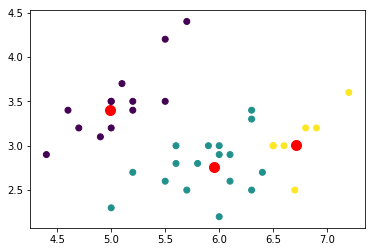

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='o')
plt.show()

Видно что алгоритм определил целевую переменную свойственную группу около центра группы

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

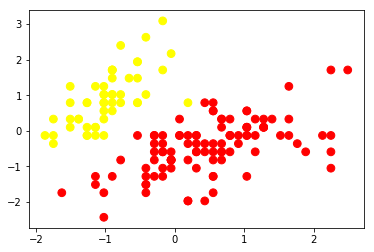

In [36]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [37]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

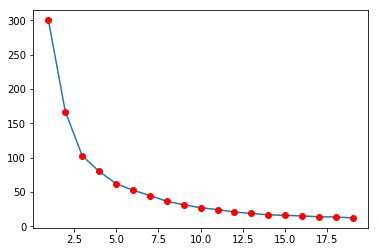

In [38]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Нужно 3-4 кластера 

In [39]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

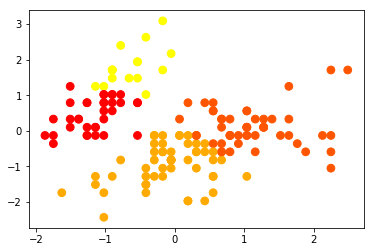

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

Правильный ответ 3 на 4 тоже выглядит не плохо